# Boston Budget Analysis Project
This project aims to analyze the City of Boston’s annual budget to understand trends in spending and how they have evolved over time. The primary focus will be on the operating and capital budgets, with additional inisghts into spending per capita and per specific sectors such as education and public safety. The goal is to provide actionable insights that can help the City of Boston improve budget allocation and optimize spending.

## Data Collection & Cleaning

In [1]:
import pandas as pd

# Load the datasets
operating_df = pd.read_csv("operating_budget.csv")
capital_df = pd.read_csv("capital_budget.csv")

# Inspect first few rows
print(operating_df.head())
print(capital_df.head())

# Check for missing values
print(operating_df.isnull().sum())
print(capital_df.isnull().sum())

# Replace special missing values
operating_df.replace({"#Missing": None}, inplace=True)
capital_df.replace({"#Missing": None}, inplace=True)

# Fill missing values
operating_df.fillna(0, inplace=True)
capital_df.fillna(0, inplace=True)

# Define new column names for easier readability
operating_columns = {
    "_id": "id",
    "Cabinet": "cabinet",
    "Dept": "department",
    "Program": "program",
    "Expense Category": "expense_category",
    "FY22 Actual Expense": "fy22_actual",
    "FY23 Actual Expense": "fy23_actual",
    "FY24 Appropriation": "fy24_appropriation",
    "FY25 Budget": "fy25_budget"
}

capital_columns = {
    "_id": "id",
    "Department": "department",
    "Project_Name": "project_name",
    "Scope_Of_Work": "scope_of_work",
    "PM_Department": "pm_department",
    "Project_Status": "project_status",
    "Neighborhood": "neighborhood",
    "Authorization_Existing": "authorization_existing",
    "Authorization_FY": "authorization_fy",
    "Authorization_Future": "authorization_future",
    "Grant_Existing": "grant_existing",
    "Grant_FY": "grant_fy",
    "Grant_Future": "grant_future",
    "GO_Expended": "go_expended",
    "Capital_Year_0": "capital_year_0",
    "CapitalYear_1": "capital_year_1",
    "Capital_Year_25": "capital_year_25",
    "Grant_Expended": "grant_expended",
    "Grant_Year_0": "grant_year_0",
    "Grant_Year_1": "grant_year_1",
    "GrantYear_25": "grant_year_25",
    "External_Funds": "external_funds",
    "Total_Project_Budget": "total_project_budget"
}

# Rename columns
operating_df.rename(columns=operating_columns, inplace=True)
capital_df.rename(columns=capital_columns, inplace=True)

   _id          Cabinet            Dept                 Program  \
0    1  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
1    2  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
2    3  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
3    4  Mayor's Cabinet  Mayor's Office  Mayor's Administration   
4    5  Mayor's Cabinet  Mayor's Office  Mayor's Administration   

                Expense Category FY22 Actual Expense FY23 Actual Expense  \
0             Personnel Services          1624903.69          2374448.36   
1           Contractual Services            284597.9           383743.11   
2           Supplies & Materials            28541.55            74491.63   
3  Current Charges & Obligations             19410.3            25350.83   
4                      Equipment            16164.36            44132.61   

  FY24 Appropriation FY25 Budget  
0         1921403.81  2217748.39  
1          219633.42      234628  
2           55573.65       60000  


In [2]:
# Standardize data types
# Convert budget columns to numeric types (float)
operating_budget_columns = ["fy22_actual", "fy23_actual", "fy24_appropriation", "fy25_budget"]
for col in operating_budget_columns:
    operating_df[col] = pd.to_numeric(operating_df[col], errors='coerce').fillna(0)

capital_budget_columns = ["authorization_existing", "authorization_fy", "authorization_future",
                          "grant_existing", "grant_fy", "grant_future", "go_expended", 
                          "capital_year_0", "capital_year_1", "capital_year_25", "grant_expended", 
                          "grant_year_0", "grant_year_1", "grant_year_25", "external_funds", 
                          "total_project_budget"]
for col in capital_budget_columns:
    capital_df[col] = pd.to_numeric(capital_df[col], errors='coerce').fillna(0)

# Convert categorical text columns to consistent format 
operating_text_columns = ["cabinet", "department", "program", "expense_category"]
operating_df[operating_text_columns] = operating_df[operating_text_columns].apply(lambda x: x.str.title())

capital_text_columns = ["department", "project_name", "scope_of_work", "pm_department", 
                        "project_status", "neighborhood"]
capital_df[capital_text_columns] = capital_df[capital_text_columns].apply(lambda x: x.str.title())

# Save cleaned datasets
operating_df.to_csv("cleaned_operating_budget.csv", index=False)
capital_df.to_csv("cleaned_capital_budget.csv", index=False)

# Verify the changes
print("Operating Budget Columns:", operating_df.columns)
print("Capital Budget Columns:", capital_df.columns)

Operating Budget Columns: Index(['id', 'cabinet', 'department', 'program', 'expense_category',
       'fy22_actual', 'fy23_actual', 'fy24_appropriation', 'fy25_budget'],
      dtype='object')
Capital Budget Columns: Index(['id', 'department', 'project_name', 'scope_of_work', 'pm_department',
       'project_status', 'neighborhood', 'authorization_existing',
       'authorization_fy', 'authorization_future', 'grant_existing',
       'grant_fy', 'grant_future', 'go_expended', 'capital_year_0',
       'capital_year_1', 'capital_year_25', 'grant_expended', 'grant_year_0',
       'grant_year_1', 'grant_year_25', 'external_funds',
       'total_project_budget'],
      dtype='object')


## Data Integrity Check
1. Outlier Detection

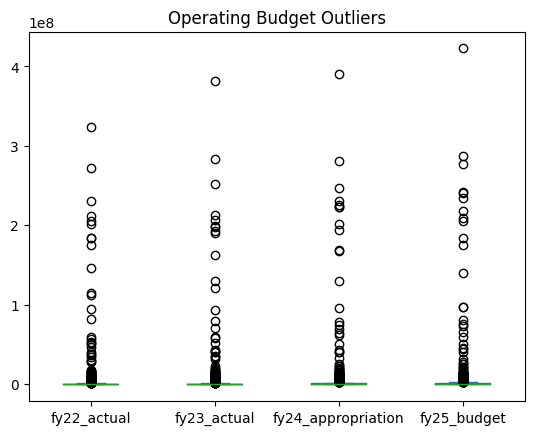

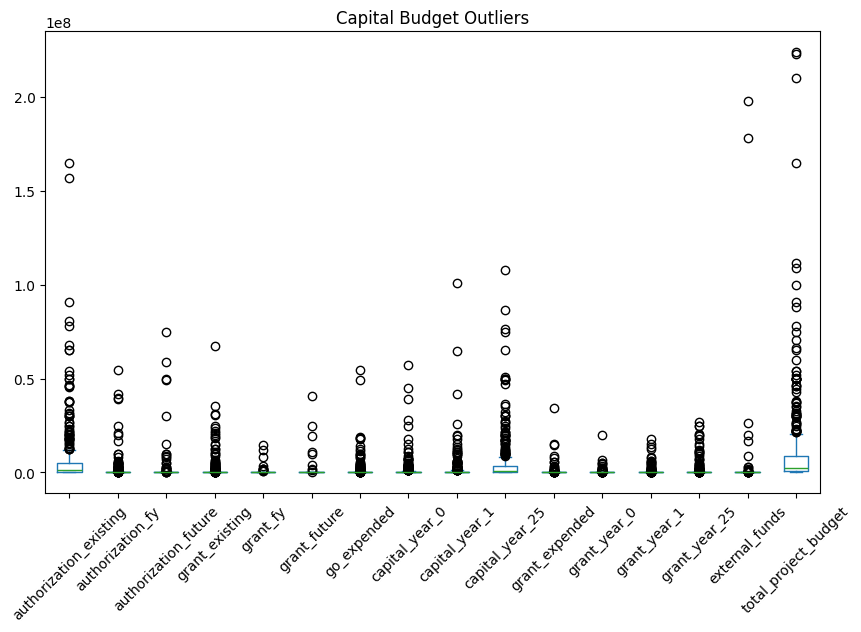

In [3]:
import matplotlib.pyplot as plt

# Box plot for detecting outliers in operating budget
operating_df[["fy22_actual", "fy23_actual", "fy24_appropriation", "fy25_budget"]].plot(kind='box')
plt.title("Operating Budget Outliers")
plt.show()

# Box plot for detecting outliers in capital budget
capital_df[capital_budget_columns].plot(kind='box', figsize=(10, 6))
plt.title("Capital Budget Outliers")
plt.xticks(rotation=45)
plt.show()

2. Consistent Check

In [4]:
# Check unique values in department columns for consistency
print("Operating Department Unique Values:", operating_df["department"].unique())
print("Capital Department Unique Values:", capital_df["department"].unique())

Operating Department Unique Values: ["Mayor'S Office" 'Election Division' 'Listing Board'
 'Intergovernmental Relations' 'Law Department' 'Office Of Equity'
 'Office Of Diversity' 'Office Of Resiliency & Racial Equity'
 'Office Of Language & Communications Access' 'Human Right Commission'
 'Office For Immigrant Advancement' "Women'S Advancement"
 'Black Male Advancement' 'Fair Housing & Equity' 'Lgbtq+ Advancement'
 'Commission For Persons W/Disabilities'
 'Office Of Police Accountability & Transparency'
 'Property Management Department' 'Public Facilities Department'
 'Inspectional Services Department' 'Neighborhood Services'
 'Office Of Arts & Culture' 'Office Of Economic Opportunity & Inclusion'
 'Consumer Affairs & Licensing' 'Supplier Diversity' 'Office Of Tourism'
 'Labor Compliance And Worker Protections'
 'Youth Employment And Opportunity' 'Office Of Workforce Development'
 'Boston Public Schools' 'Environment Department' 'Parks And Recreation'
 'Cemetery Division' 'Office Of H

3. Duplicate Records

In [5]:
# Check for duplicates
duplicating_operating = operating_df[operating_df.duplicated()]
duplicating_capital = capital_df[capital_df.duplicated()]

print("Operating Budget Duplicates:", duplicating_operating)
print("Capital Budget Duplicates:", duplicating_capital)

# Drop duplicates if any found
operating_df.drop_duplicates(inplace=True)
capital_df.drop_duplicates(inplace=True)

Operating Budget Duplicates: Empty DataFrame
Columns: [id, cabinet, department, program, expense_category, fy22_actual, fy23_actual, fy24_appropriation, fy25_budget]
Index: []
Capital Budget Duplicates: Empty DataFrame
Columns: [id, department, project_name, scope_of_work, pm_department, project_status, neighborhood, authorization_existing, authorization_fy, authorization_future, grant_existing, grant_fy, grant_future, go_expended, capital_year_0, capital_year_1, capital_year_25, grant_expended, grant_year_0, grant_year_1, grant_year_25, external_funds, total_project_budget]
Index: []

[0 rows x 23 columns]


4. Cross-field Validation

In [6]:
# Check if FY24 appropriation is less than or equal to FY25 budget in operating dataset
inconsistent_budgets = operating_df[operating_df["fy24_appropriation"] > operating_df["fy25_budget"]]
print("Inconsistent Budget Records:", inconsistent_budgets)

# Validate Total_Project_Budget in capital dataset
capital_df["sum_authorization"] = (capital_df["authorization_existing"] +
                                   capital_df["authorization_fy"] + 
                                   capital_df["authorization_future"])
inconsistent_capital_budget = capital_df[capital_df["total_project_budget"] < capital_df["sum_authorization"]]
print("Inconsistent Capital Budget Records:", inconsistent_capital_budget)

# Save the cleaned and standardized datasets
operating_df.to_csv("final_operating_budget.csv", index=False)
capital_df.to_csv("final_capital_budget.csv", index=False)

# Verify data types
print("Operating Budget Column Types:", operating_df.dtypes)
print("Capital Budget Column Types:", capital_df.dtypes)

Inconsistent Budget Records:       id                  cabinet         department  \
5      6          Mayor'S Cabinet     Mayor'S Office   
7      8          Mayor'S Cabinet     Mayor'S Office   
8      9          Mayor'S Cabinet     Mayor'S Office   
12    13          Mayor'S Cabinet     Mayor'S Office   
21    22          Mayor'S Cabinet  Election Division   
..   ...                      ...                ...   
897  898  Non-Mayoral Departments         City Clerk   
900  901  Non-Mayoral Departments         City Clerk   
902  903  Non-Mayoral Departments         City Clerk   
905  906  Non-Mayoral Departments         City Clerk   
919  920  Non-Mayoral Departments       City Council   

                       program      expense_category  fy22_actual  \
5            Mayor'S Executive    Personnel Services    583859.32   
7    Mayor'S Policy & Planning    Personnel Services    768993.95   
8    Mayor'S Policy & Planning  Contractual Services    253549.07   
12         New Urban M

## Feature Extraction
- **Per Capital Spending:** represents per capita spending for each year, to see how much the city spends per resident by department.

- **Department-Specific Allocations:** analyzes how much each department receives within total budget, both as an absolute amount and as a percentage of the total budget.

- **Program-Level Expenditures:** analyzes spending at the program level, which can provide insights into how much is allocated to specific initiatives or services within each department.

- **Year-over-year Budget Growth:** calculates the growth rate of each budget from year to year.

- **Average Spending Per Program:** calculates the average spending per program across all departments to get a sense of typical program costs. 

In [7]:
# Per Capita Spending
boston_population = 654423

operating_df["fy25_per_capita"] = operating_df["fy25_budget"] / boston_population

operating_df["fy22_per_capita"] = operating_df["fy22_actual"] / boston_population
operating_df["fy23_per_capita"] = operating_df["fy23_actual"] / boston_population
operating_df["fy24_per_capita"] = operating_df["fy24_appropriation"] / boston_population

In [8]:
# Department-Specific Allocations
# Calculate total budget for FY25 across all departments
total_fy25_budget = operating_df["fy25_budget"].sum()

# Calculate department-specific budget share for FY25
operating_df["fy25_budget_share"] = operating_df["fy25_budget"] / total_fy25_budget

In [9]:
# Program-level expenditures
# Sum up expenditures by program within each department for FY25
program_level_expenditures = operating_df.groupby(["department", "program"])["fy25_budget"].sum().reset_index()
program_level_expenditures.rename(columns={"fy25_budget": "fy25_program_budget"}, inplace=True)

operating_df = operating_df.merge(program_level_expenditures, on=["department", "program"], how="left")

In [10]:
# Calculate year-to-year growth rate for FY23 compared 
operating_df["fy23_growth"] = (operating_df["fy23_actual"] - operating_df["fy22_actual"]) / operating_df["fy22_actual"] * 100

# Similarly, calculate growth rates for other fiscal years if needed
operating_df["fy24_growth"] = (operating_df["fy24_appropriation"] - operating_df["fy23_actual"]) / operating_df["fy23_actual"] * 100
operating_df["fy25_growth"] = (operating_df["fy25_budget"] - operating_df["fy24_appropriation"]) / operating_df["fy24_appropriation"] * 100

In [11]:
# Calculate average spending per program for FY25
avg_program_spending = operating_df.groupby("program")["fy25_budget"].mean().reset_index()
avg_program_spending.rename(columns={"fy25_budget": "fy25_avg_program_spending"}, inplace=True)

# Merge back with the  main dataframe
operating_df = operating_df.merge(avg_program_spending, on="program", how="left")

## Initial Insights & Visualizations
1. Total Budget by Department

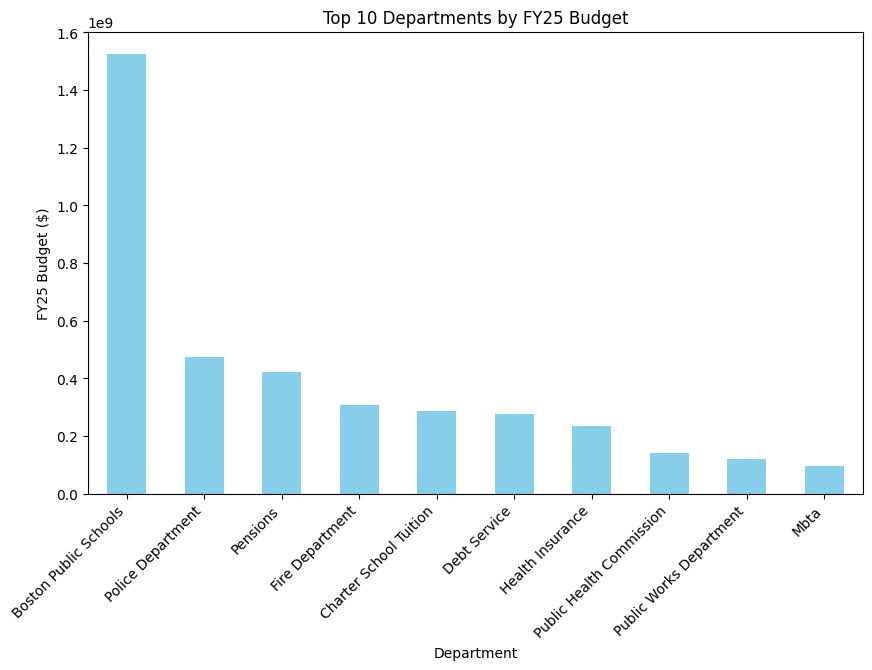

In [12]:
# Sum budget by department and get top 10 departments
top_10_departments = operating_df.groupby("department")["fy25_budget"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_10_departments.plot(kind="bar", color="skyblue")
plt.title("Top 10 Departments by FY25 Budget")
plt.xlabel("Department")
plt.ylabel("FY25 Budget ($)")
plt.xticks(rotation=45, ha="right")
plt.show()


- **Education as a Major Priority:** The Boston Public Schools department has the largest budget by a significant margin, with over $1.5 billion allocated. This indicates that education is a top priority for the city, receiving more funding than any other department. It's likely due to the high costs associated with staffing, maintaining facilities, and providing educational services to a large student population. 

- **Public Safety Investment:** The Police Department and Fire Department also receive substantial funding, with the Police Department having the second-largest budget after Boston Public Schools. This suggests a strong emphasis on public safety, as both departments are essential for maintaining law and order and providing emergency services in the city.

- **Commitment to Employee Benefits:** Pensions and Health Insurance are significant budget items, indicating the city's commitment to providing benefits for its employees, especially for retirees. These categories reflect the city's responsibility toward long-term employee welfare and benefits.

2. Year-Over-Year Budget Growth

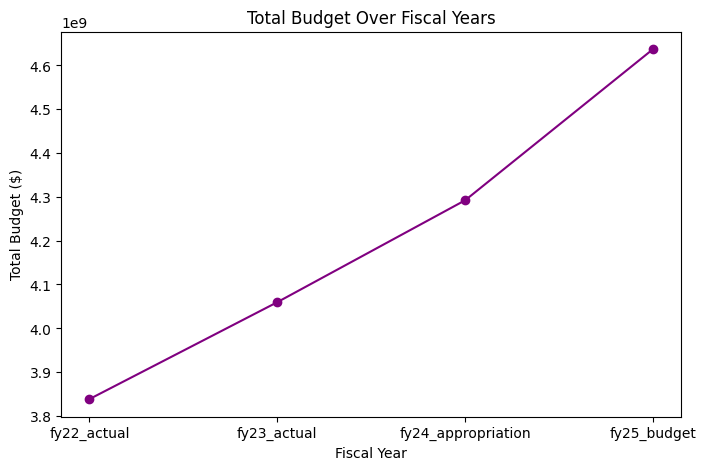

In [13]:
# Calculate total budget for each fiscal year
yearly_budget = operating_df[["fy22_actual", "fy23_actual", "fy24_appropriation", "fy25_budget"]].sum()

# Plot
plt.figure(figsize=(8, 5))
yearly_budget.plot(kind="line", marker='o', color="purple")
plt.title("Total Budget Over Fiscal Years")
plt.xlabel("Fiscal Year")
plt.ylabel("Total Budget ($)")
plt.xticks(range(len(yearly_budget.index)), yearly_budget.index)
plt.show()

This trend suggests that Boston is committed to expanding or maintaining its services to meet the needs of its population. The steady budget increase could reflect economic growth, a higher tax base, or additional federal/state funding. It may also indicate increased operational costs due to inflation or an emphasis on capital projects and social programs. This trend is crucial for future planning and budgeting, as it points to the need for sustainable revenue sources to support continuous budget growth.

3. Per Capita Spending by Department

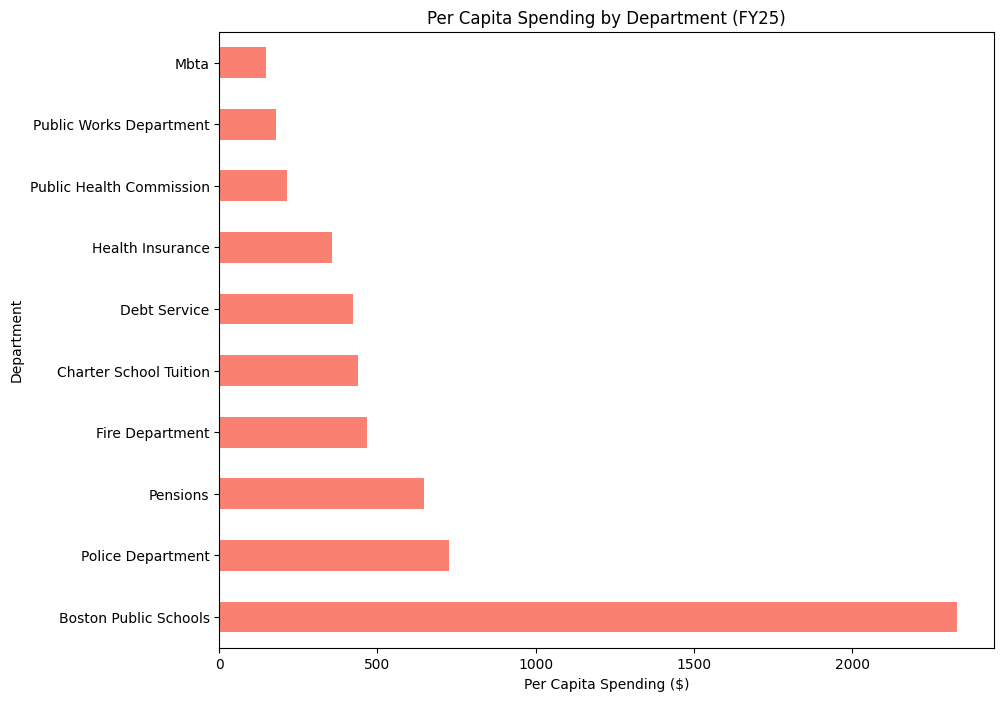

In [14]:
# Plot per capita spending for each department
plt.figure(figsize=(10, 8))
operating_df.groupby("department")["fy25_per_capita"].sum().sort_values(ascending=False).head(10).plot(kind="barh", color="salmon")
plt.title("Per Capita Spending by Department (FY25)")
plt.xlabel("Per Capita Spending ($)")
plt.ylabel("Department")
plt.show()

This graph highlights that:
- **Education and Public Safety** are top priorities for per capita spending, which aligns with Boston's investment in the well-being and safety of its residents.
- **Employee Benefits** (Pensions and Health Insurance) and **Debt Service** are substantial, indicating a focus on long-term commitments and financial responsibilities.
- **Health and Infrastructure** receive significant investment, though on a per capita basis, they are lower than direct services like education and public safety.

These insights suggesst that Boston places a high value on core public services, education, and employee welfare while responsibly managing debt and infrastructure needs.

4. Program-Level Expenditures

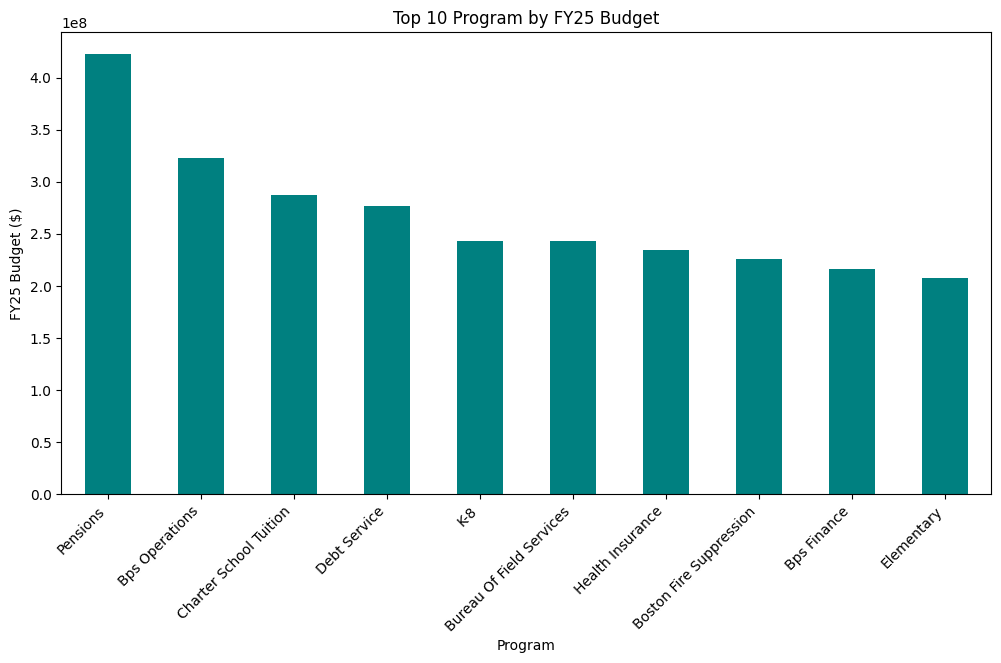

In [15]:
# Sum budget by program and get top 10
program_budget = operating_df.groupby("program")["fy25_budget"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
program_budget.plot(kind="bar", color="teal")
plt.title("Top 10 Program by FY25 Budget")
plt.xlabel("Program")
plt.ylabel("FY25 Budget ($)")
plt.xticks(rotation=45, ha="right")
plt.show()

These allocations demonstrate that Boston prioritizes a balanced approach between long-term commitments (pensions and debt), essential public services (education and public safety), and employee welfare (health insurance). This distribution provides insights into the city's focus areas and strategic spending to support community well-being and operational stability.

5. Department Budget Share Pie Chart

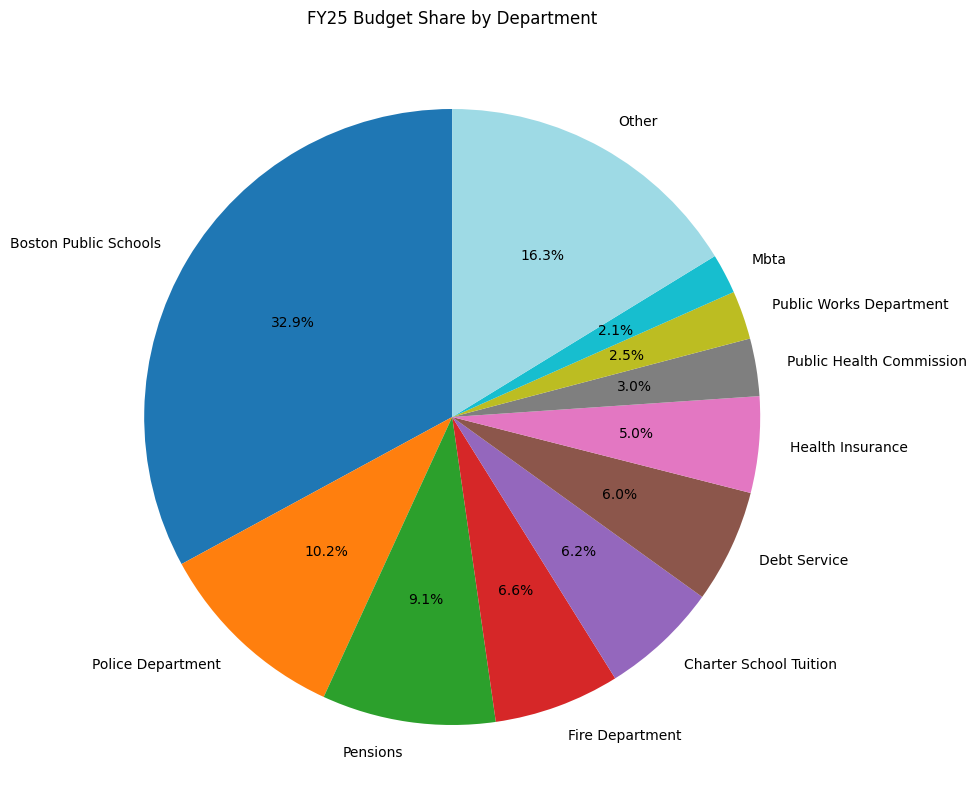

In [16]:
# Calculate the department's share of the total budget
department_budget = operating_df.groupby("department")["fy25_budget"].sum()
department_share = department_budget / department_budget.sum() * 100

# Sort by budget share and select the top 10 departments
top_10_departments_share = department_share.sort_values(ascending=False).head(10)

# Calculate the share for all other departments and add as "Other"
other_share = 100 - top_10_departments_share.sum()
top_10_departments_share["Other"] = other_share

# Plot the pie chart
plt.figure(figsize=(10, 10))
top_10_departments_share.plot(kind="pie", autopct='%.1f%%', startangle=90, cmap="tab20")
plt.title("FY25 Budget Share by Department")
plt.ylabel("")
plt.show()


- **Boston Public Schools** accounts for the largest single share of the FY25 budget at 32.9%, nearly one-third of the total budget. This substantial allocation reflects the city’s strong emphasis on education and underscores the importance of funding public schools to support Boston’s student population, educational staff, and school facilities.

- The **Police Department** holds the second-largest share at 10.2% of the total budget, followed closely by the Fire Department at 6.6%. Together, these departments receive a significant portion of the budget, indicating that public safety is a key priority for Boston. This investment supports policing, emergency response, and fire prevention services across the city.

The chart provides a visual breakdown of Boston’s budget priorities, emphasizing the city’s commitment to core services (education, safety, health) and financial obligations (pensions and debt service). This distribution highlights Boston’s balanced approach to addressing immediate public needs while managing long-term financial responsibilities.

6. Clustering Programs Based on Budget Similarities

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


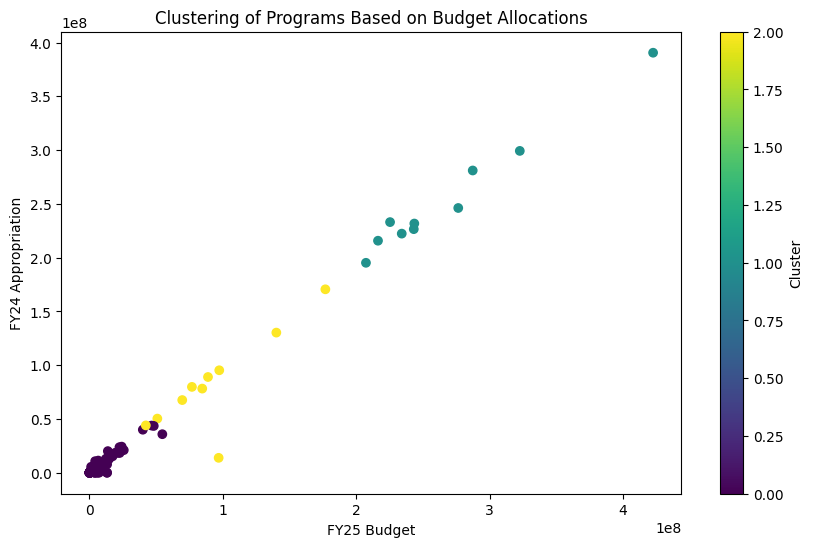

In [17]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare data for clustering
program_data = operating_df.groupby("program")[["fy22_actual", "fy23_actual", "fy24_appropriation", "fy25_budget"]].sum()
program_data_normalized = (program_data - program_data.mean()) / program_data.std()

# Fit K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(program_data_normalized)
program_data["cluster"] = kmeans.labels_

# Plot clustering results
plt.figure(figsize=(10, 6))
plt.scatter(program_data["fy25_budget"], program_data["fy24_appropriation"], c=program_data["cluster"], cmap="viridis")
plt.xlabel("FY25 Budget")
plt.ylabel("FY24 Appropriation")
plt.title("Clustering of Programs Based on Budget Allocations")
plt.colorbar(label="Cluster")
plt.show()

This clustering visualization provides a clear snapshot of how the city of Boston allocates its budget across programs with different funding levels. It highlights budget stability and identifies distinct groups of programs with different funding magnitude, allowing for better-targeted planning and resource allocation. This analysis can support strategic decisions around which programs may need additional resources or restructuring in future fiscal years.

Three distinct clusters:
- Cluster 0: Contains the programs with the smallest budget allocations in both FY24 and FY25.
- Cluster 1: Represents programs with mid-range budget allocations.
- Cluster 2: Consists of high-budget programs, with some programs receiving more than $200 million in both FY24 and FY25.

Budget Consistency:
- The points are aligned closely along a line, suggesting a **positive correlation** between FY24 appropriations and FY25 budget allocations. This alignment indicates that most programs with higher budgets in FY24 tend to have similarly high allocations in FY25, reflecting budget consistency budget consistency or stability over these two years.  

## Outlier Detection and Handling
1. Identify Outliers

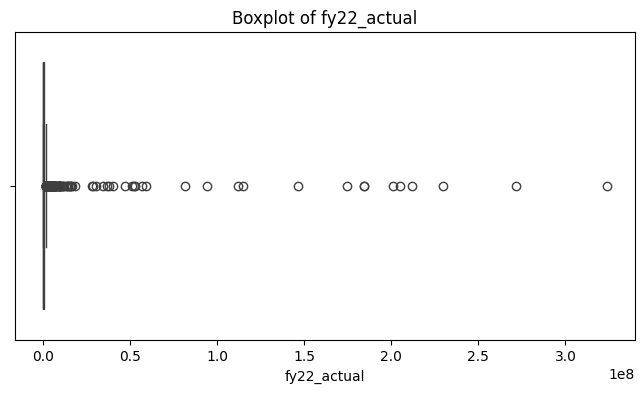

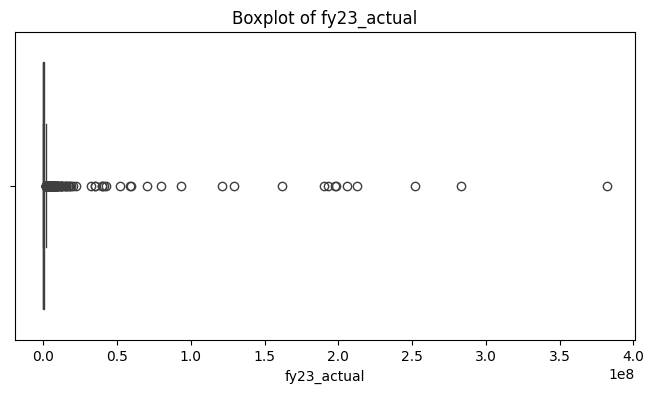

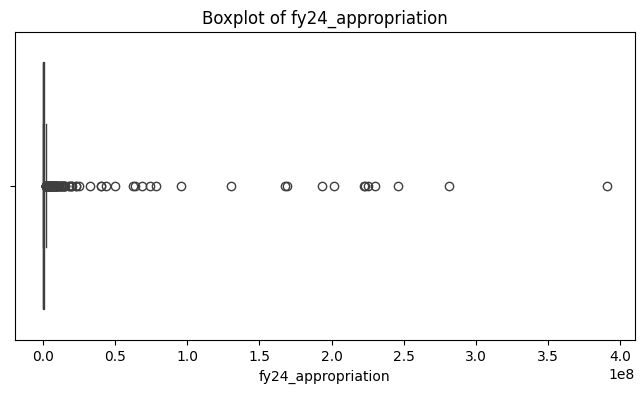

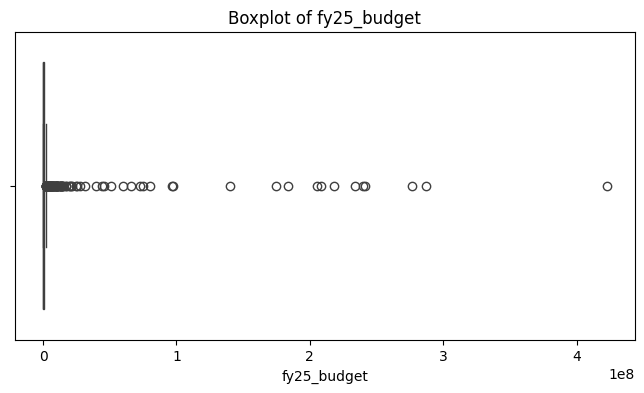

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers in operating budget data
numeric_columns = ["fy22_actual", "fy23_actual", "fy24_appropriation", "fy25_budget"]
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=operating_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


2. Handle Outliers

In [20]:
from scipy.stats import zscore

# Compute Z-scores for numeric columns
z_scores = operating_df[numeric_columns].apply(zscore)

# Filter rows where all Z-scores are within 3 standard deviations
operating_df = operating_df[(z_scores < 3).all(axis=1)]

# Check the shape after filtering
print(f"Shape after filtering outliers: {operating_df.shape}")


Shape after filtering outliers: (928, 19)


## Predictive Modeling
1. Forecast Future Budget
- Train regression models (e.g., Linear Regression, Random Forest) to forecast future budgets based on historical data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = operating_df[["fy22_actual", "fy23_actual", "fy24_appropriation"]]
y = operating_df["fy25_budget"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - RMSE: {rmse:.2f}, R²: {r2:.2f}")


Linear Regression - RMSE: 1752270.97, R²: 0.96


2. Experiment with Advanced Models
- Using a Random Forest Regressor for potentially better performance

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest - RMSE: 2148624.61, R²: 0.95


## Model Testing and Validation
1. Perform Cross-Validation
- Use k-fold cross-validation to validate model performance

In [30]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_rmse = (-cv_scores.mean()) ** 0.5
print(f"Cross-Validated RMSE: {cv_rmse:.2f}")


Cross-Validated RMSE: 1660795.77


2. Feature Importance Analysis
- Identify which features contribute most to the model's predictions

              Feature  Importance
2  fy24_appropriation    0.767501
1         fy23_actual    0.189524
0         fy22_actual    0.042976


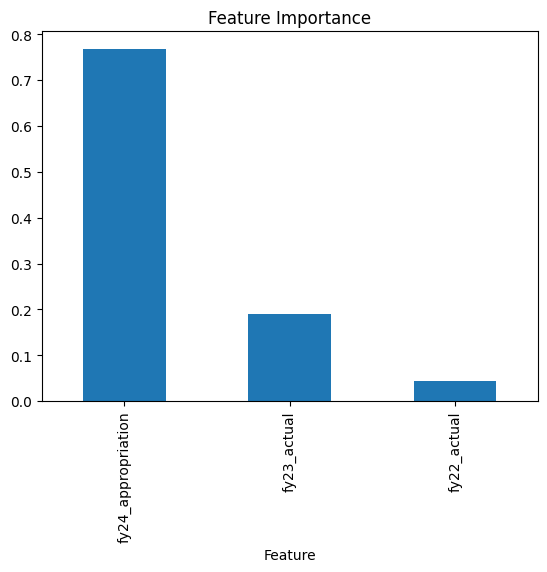

In [31]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print(feature_importance_df)

# Plot feature importance
feature_importance_df.plot(kind="bar", x="Feature", y="Importance", legend=False, title="Feature Importance")
plt.show()


## Additional Visualizations
1. Heatmap for Geographic Budget Distribution
- Visualize capital budget allocations across neighborhoods

In [33]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [34]:
import folium
from folium.plugins import HeatMap

# Aggregate spending by neighborhood
neighborhood_data = capital_df.groupby("neighborhood")["total_project_budget"].sum().reset_index()

# Create a base map
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Add heatmap
HeatMap(data=neighborhood_data[["latitude", "longitude", "total_project_budget"]].values).add_to(boston_map)

# Save the map to HTML
boston_map.save("boston_budget_heatmap.html")


KeyError: "['latitude', 'longitude'] not in index"